In [1]:
import os
import pandas as pd
os.chdir("C:/Users/Akhil/Desktop")
train = pd.read_csv("Train_Dataset.csv")

In [2]:
train['Exp'] = train["experience"].str.extract("(\d*\d.?\d+)", expand=True)
train['Exp'] = train['Exp'].str.split('-')
train[['start','end']] = pd.DataFrame(train.Exp.values.tolist())
train['Avg Exp'] = train[['start','end']].astype(float).mean(axis=1)
train['Salary'] = train['salary'].str.split('to')
train[['sal_start','sal_end']] = pd.DataFrame(train.Salary.values.tolist())
train['Avg_Salary'] = train[['sal_start','sal_end']].astype(float).mean(axis=1)
X = train[['job_desig', 'key_skills', 'City coded', 'Avg Exp', 'Avg_Salary','company_name_encoded']]
X.drop(['Avg Exp'], axis=1)
X.dropna(subset=['key_skills'], inplace=True)

C:\Users\Akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [3]:
X['Avg_Exp'] = X['Avg Exp'].astype(int)
X['Avg_Salary'] = X['Avg_Salary'].astype(int)
X = X.drop(['Avg Exp'], axis=1)

C:\Users\Akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [5]:
X.job_desig = X.job_desig.astype(str)

descr = X[['job_desig','key_skills', 'Avg_Salary']]
descr['count'] = descr['job_desig'].apply(lambda x : len(str(x)))
descr.head()

C:\Users\Akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,job_desig,key_skills,Avg_Salary,count
0,Senior Exploit and Vulnerability Researcher,"team skills, communication skills, analytical ...",8,43
1,Head SCM,"ppc, logistics, inventory management, supply c...",12,8
2,Deputy Manager - Talent Management & Leadershi...,"HR Analytics, Employee Engagement, Training, S...",20,66
3,Associate Manager Data Engineering,"SQL, Javascript, Automation, Python, Ruby, Ana...",12,34
4,TS- GSA- Senior Analyst,"accounting, finance, cash flow, financial plan...",4,23


C:\Users\Akhil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


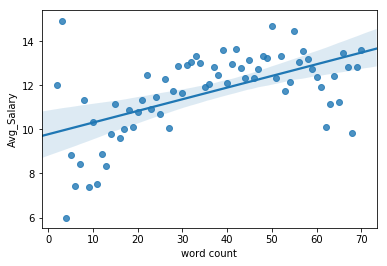

In [6]:
df = descr.groupby('count')['Avg_Salary'].mean().reset_index()
sns.regplot(x=df["count"], y=(df["Avg_Salary"]))
plt.xlabel("word count")
plt.show()

In [7]:
from string import punctuation
punctuation
# Create a list of punctuation replacements
punctuation_symbols = []
for symbol in punctuation:
    punctuation_symbols.append((symbol, ''))
    
punctuation_symbols

[('!', ''),
 ('"', ''),
 ('#', ''),
 ('$', ''),
 ('%', ''),
 ('&', ''),
 ("'", ''),
 ('(', ''),
 (')', ''),
 ('*', ''),
 ('+', ''),
 (',', ''),
 ('-', ''),
 ('.', ''),
 ('/', ''),
 (':', ''),
 (';', ''),
 ('<', ''),
 ('=', ''),
 ('>', ''),
 ('?', ''),
 ('@', ''),
 ('[', ''),
 ('\\', ''),
 (']', ''),
 ('^', ''),
 ('_', ''),
 ('`', ''),
 ('{', ''),
 ('|', ''),
 ('}', ''),
 ('~', '')]

In [8]:
# Examine list of stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import string

# Create a function to remove punctuations
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

# Create a function to remove stop words
def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

# Create a function to lowercase the words
def to_lower(x):
    return x.lower()

In [10]:
# Stem the Words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
X['job_desig'] = X['job_desig'].apply(porter.stem)

X['job_desig'] = X['job_desig'].apply(remove_punctuation)
X['job_desig'] = X['job_desig'].apply(remove_stop_words)
X['job_desig'] = X['job_desig'].apply(to_lower)

X['key_skills'] = X['key_skills'].apply(remove_punctuation)
X['key_skills'] = X['key_skills'].apply(remove_stop_words)
X['key_skills'] = X['key_skills'].apply(to_lower)

X['City coded'] = X['City coded'].apply(to_lower)

In [11]:
X.head()

,job_desig,key_skills,City coded,Avg_Salary,company_name_encoded,Avg_Exp
0,senior exploit vulnerability research,team skills communication skills analytical sk...,delhi ncr,8,3687,6
1,head scm,ppc logistics inventory management supply chai...,tier 2,12,458,13
2,deputy manager talent management leadership ...,hr analytics employee engagement training succ...,delhi ncr,20,4195,7
3,associate manager data engin,sql javascript automation python ruby analytic...,bengaluru,12,313,8
4,ts gsa senior analyst,accounting finance cash flow financial plannin...,delhi ncr,4,1305,2


In [12]:
# CountVectorizer - name & categories
cv = CountVectorizer(min_df=10)
X_job_desig = cv.fit_transform(X['job_desig'])
cv1 = CountVectorizer(min_df=10)
X_key_skills = cv1.fit_transform(X['key_skills'])
cv2 = CountVectorizer(min_df=10)
X_City_coded = cv2.fit_transform(X['City coded'])

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_job_desig = tfidf.fit_transform(X_job_desig)
tfidf1 = TfidfTransformer()
X_key_skills = tfidf1.fit_transform(X_key_skills)
tfidf2 = TfidfTransformer()
X_City_coded = tfidf2.fit_transform(X_City_coded)

In [14]:
X_dummies = csr_matrix(pd.get_dummies(X[['company_name_encoded', 'Avg_Exp']], sparse=True).values)
X_dummies

<19801x2 sparse matrix of type '<class 'numpy.int64'>'
	with 39154 stored elements in Compressed Sparse Row format>

In [15]:
sparse_merge = hstack((X_job_desig, 
                       X_key_skills, X_City_coded, X_dummies)).tocsr()

In [16]:
sparse_merge

<19801x2209 sparse matrix of type '<class 'numpy.float64'>'
	with 269354 stored elements in Compressed Sparse Row format>

In [17]:
#------------------------------------------------------------------------------------------

In [18]:
test = pd.read_csv("Test_Dataset.csv")

In [19]:
test['Exp'] = test["experience"].str.extract("(\d*\d.?\d+)", expand=True)
test['Exp'] = test['Exp'].str.split('-')
test[['start','end']] = pd.DataFrame(test.Exp.values.tolist())
test['Avg Exp'] = test[['start','end']].astype(float).mean(axis=1)
X_test = test[['job_desig', 'key_skills', 'Avg Exp', 'location', 'company_name_encoded']]
X_test.drop(['Avg Exp'], axis=1)
X_test.dropna(subset=['key_skills'], inplace=True)

C:\Users\Akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [20]:
X_test['City coded'] = X_test['location']
X_test = X_test.drop(['location'], axis = 1)

C:\Users\Akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
X_test['Avg_Exp'] = X_test['Avg Exp'].astype(int)
X_test = X_test.drop(['Avg Exp'], axis = 1)

In [22]:
X_test['job_desig'] = X_test['job_desig'].apply(porter.stem)

X_test['job_desig'] = X_test['job_desig'].apply(remove_punctuation)
X_test['job_desig'] = X_test['job_desig'].apply(remove_stop_words)
X_test['job_desig'] = X_test['job_desig'].apply(to_lower)

X_test['key_skills'] = X_test['key_skills'].apply(remove_punctuation)
X_test['key_skills'] = X_test['key_skills'].apply(remove_stop_words)
X_test['key_skills'] = X_test['key_skills'].apply(to_lower)

X_test['City coded'] = X_test['City coded'].apply(to_lower)

In [23]:
X_test_job_desig = cv.transform(X_test['job_desig'])
X_test_key_skills = cv1.transform(X_test['key_skills'])
X_test_City_coded = cv2.transform(X_test['City coded'])


In [24]:
X_test_job_desig = tfidf.transform(X_test_job_desig)
X_test_key_skills = tfidf1.transform(X_test_key_skills)
X_test_City_coded = tfidf2.transform(X_test_City_coded)

In [25]:
X_test_dummies = csr_matrix(pd.get_dummies(X_test[['company_name_encoded', 'Avg_Exp']], sparse=True).values)
X_test_dummies

<6601x2 sparse matrix of type '<class 'numpy.int64'>'
	with 13047 stored elements in Compressed Sparse Row format>

In [26]:
sparse_merge_test = hstack((X_test_job_desig, 
                       X_test_key_skills, X_test_City_coded, X_test_dummies)).tocsr()

In [27]:
sparse_merge_test

<6601x2209 sparse matrix of type '<class 'numpy.float64'>'
	with 89141 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(sparse_merge, X.Avg_Salary)

In [29]:
predicted = clf.predict(sparse_merge_test)

In [30]:
predicted

array([20,  1,  8, ..., 12, 20, 12])

In [31]:
predicted[:50]

array([20,  1,  8,  1,  1, 12, 37,  1, 12,  1, 37, 12, 20, 37, 20, 20,  1,
        1, 12, 20, 20, 20,  8,  8, 20,  4, 20, 37, 37, 12,  1, 20, 20, 37,
       37,  8, 20,  1,  1, 20,  1,  8, 37, 20,  8, 20,  4,  8, 37, 12])

# KNeighborsClassifier

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sparse_merge, X.Avg_Salary, test_size=0.20)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[395 152  45  34  28   2]
 [179 208 111  38  24   0]
 [100 144 188 188  89   5]
 [ 70  70 144 362 228  21]
 [ 31  46  83 288 329  69]
 [  5   3  10  38 107 127]]
              precision    recall  f1-score   support

           1       0.51      0.60      0.55       656
           4       0.33      0.37      0.35       560
           8       0.32      0.26      0.29       714
          12       0.38      0.40      0.39       895
          20       0.41      0.39      0.40       846
          37       0.57      0.44      0.49       290

   micro avg       0.41      0.41      0.41      3961
   macro avg       0.42      0.41      0.41      3961
weighted avg       0.40      0.41      0.40      3961



# LinearRegression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [37]:
X_train, X_test, y_train, y_test = train_test_split(sparse_merge, X.Avg_Salary, test_size = 0.2, random_state=9)

In [38]:
linr = LinearRegression()
linr.fit(X_train, y_train)
pred = linr.predict(X_test)

In [39]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [40]:
print(test_set_rmse)
print(test_set_r2)

6.756519644445615
0.5129408939230933


# RandomForestRegressor

In [43]:
X_train, X_test, y_train, y_test = train_test_split(sparse_merge, X.Avg_Salary, test_size = 0.25, random_state = 42)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [45]:
preds = rf.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, preds))

MAE: 4.773504217570728


In [ ]:
errors = abs(preds - y_test)
errors

In [48]:
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: 4.77 degrees.


In [49]:
mape = np.mean(100 * (errors / y_test))

In [50]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 15.11 %.


In [52]:
from xgboost import XGBClassifier

In [53]:
model = XGBClassifier(n_estimators=200)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [54]:
# make predictions for test data
y_pred = model.predict(X_test)

In [55]:
predictions = [round(value) for value in y_pred]

In [56]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 44.27%


In [57]:
y_pred_test = model.predict(sparse_merge_test)

In [58]:
y_pred_test

array([20,  1, 12, ..., 20, 20, 12])

In [59]:
y_pred_test[:50]

array([20,  1, 12,  1,  1,  8, 20,  1, 20,  1, 20, 12, 12, 20,  4,  8,  1,
        1, 12,  4,  8, 37,  8,  8, 12,  1, 20, 20, 20,  4,  1, 20, 12, 20,
       37,  8, 12,  1,  1, 12, 12,  8, 37,  4,  8,  8,  4, 12, 20, 12])

# GridsearchCV

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(sparse_merge, X.Avg_Salary, test_size = 0.25, random_state = 42)

In [56]:
elastic_net = ElasticNet()

In [57]:
param_grid = {"l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [58]:
gscv = GridSearchCV(elastic_net, param_grid, scoring='r2', cv=10, n_jobs= -1)

In [59]:
gscv

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [60]:
gscv.fit(X_train, y_train)

C:\Users\Akhil\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [61]:
y_pred = gscv.predict(X_test)
r2 = gscv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

In [62]:
print(y_pred)
print(r2)
print(mse)

[ 5.69780827  9.40092125  7.24922809 ... 13.50024351 10.70359848
  8.73784125]
0.4454208457327029
51.70582298581654


In [63]:
y_pred[:50]

array([ 5.69780827,  9.40092125,  7.24922809, 10.42350248,  5.47121954,
        7.74203039, 29.96048195, 13.86262087, 18.26647876, 10.58316154,
        8.860662  ,  3.921022  , 14.76238576,  7.32034669,  9.39648882,
        4.46666207,  7.88579345, 10.22432437, 22.03064828,  8.52305076,
        7.51729322, 26.16853521, 15.67546882,  3.94773594,  4.19590131,
       10.73285618,  5.79018381,  7.79235116,  9.30790533, 15.18896654,
       10.52301038, 20.52285448, 10.36729938, 13.52201182,  4.34789967,
       13.90652356,  9.19325198,  7.00279748,  8.8199094 , 12.76845486,
       14.03719426, 10.12654972, 18.69289511, 16.65223977, 11.81939706,
        9.20093428,  8.57338755, 15.33494203, 14.03719426, 10.3255103 ])

In [64]:
y_pred_test = gscv.predict(sparse_merge_test)

In [65]:
y_pred_test[:50]

array([16.93234709,  5.70960836,  8.95846821,  4.21636235,  5.15481147,
       10.12668665, 26.13641608,  4.06836132, 13.78061831,  5.05907018,
       21.41092243, 13.60900069, 10.33540462, 18.52346119,  8.49383045,
        7.09919466,  7.02785281,  3.97973169, 13.70796681,  8.66332968,
        7.15194755, 23.49856999,  7.52622227,  9.99454771, 11.74278895,
        2.30294511, 21.5690752 , 13.43606187, 16.67194899,  7.00318714,
        4.22668565, 13.788611  , 10.3270009 , 13.72111893, 31.44322037,
       10.11592474, 10.36451664,  4.17138228,  2.49092138, 10.31785383,
       10.65481997, 10.41874522, 25.02104879,  7.03299151,  6.79509368,
       11.9709477 ,  6.80107245, 12.1013544 , 13.57296463,  8.59985135])

In [68]:
y_pred_test = np.around(y_pred_test, 2)

In [69]:
y_pred_test[:50]

array([16.93,  5.71,  8.96,  4.22,  5.15, 10.13, 26.14,  4.07, 13.78,
        5.06, 21.41, 13.61, 10.34, 18.52,  8.49,  7.1 ,  7.03,  3.98,
       13.71,  8.66,  7.15, 23.5 ,  7.53,  9.99, 11.74,  2.3 , 21.57,
       13.44, 16.67,  7.  ,  4.23, 13.79, 10.33, 13.72, 31.44, 10.12,
       10.36,  4.17,  2.49, 10.32, 10.65, 10.42, 25.02,  7.03,  6.8 ,
       11.97,  6.8 , 12.1 , 13.57,  8.6 ])

In [70]:
pd.to_csv()

AttributeError: head not found